<a href="https://colab.research.google.com/github/kazezahra/kazezahra/blob/main/escepfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/casting_512x512.zip -d /content

Archive:  /content/casting_512x512.zip
   creating: /content/casting_512x512/def_front/
  inflating: /content/casting_512x512/def_front/cast_def_0_0.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_100.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1015.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_102.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1046.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1053.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1055.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1077.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1087.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1091.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1104.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1108.jpeg  
  inflating: /content/casting_512x512/def_front/cast_def_0_1112.j

Data Preprocessing

Total images: 1300
Sample data:
                                           file_path     label
0  /content/casting_512x512/ok_front/cast_ok_0_12...  ok_front
1  /content/casting_512x512/ok_front/cast_ok_0_95...  ok_front
2  /content/casting_512x512/ok_front/cast_ok_0_93...  ok_front
3  /content/casting_512x512/ok_front/cast_ok_0_76...  ok_front
4  /content/casting_512x512/ok_front/cast_ok_0_27...  ok_front
Missing values: file_path    0
label        0
dtype: int64


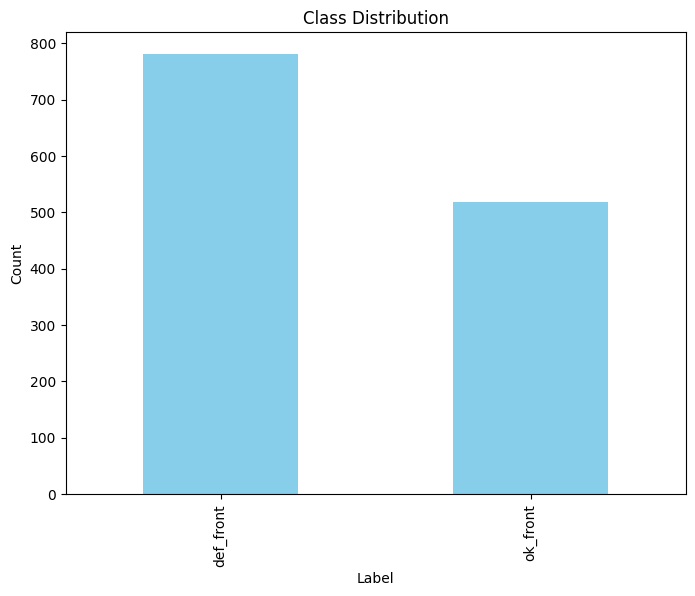

Image matrix shape: (1300, 128, 128)
Flattened data shape: (1300, 16384)


In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Dataset Exploration
# Define the dataset directory
dataset_dir = "/content/casting_512x512"

# Explore dataset structure and collect image paths
data = []
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):  # Ensure it's a directory
        for file in os.listdir(label_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(label_dir, file)
                data.append({'file_path': file_path, 'label': label})

# Convert to a DataFrame
df = pd.DataFrame(data)
print(f"Total images: {len(df)}")
print("Sample data:")
print(df.head())

# Check for missing values or inconsistencies
print("Missing values:", df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Step 2: Preprocess Images into Matrix/Vector Form
# Initialize a list to store image arrays
image_arrays = []

for idx, row in df.iterrows():
    img = Image.open(row['file_path']).convert('L')  # Convert to grayscale
    img_resized = img.resize((128, 128))  # Resize to reduce dimensionality
    img_array = np.array(img_resized)
    image_arrays.append(img_array)

# Stack images into a 3D array and flatten each image into a vector
image_matrix = np.stack(image_arrays, axis=0)
X = image_matrix.reshape(image_matrix.shape[0], -1)  # Flatten each image

# Perform dimensionality checks
print("Image matrix shape:", image_matrix.shape)
print("Flattened data shape:", X.shape)


# **Linear Algebra Techniques**

**1. Singular Value Decomposition**

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.linalg import svd

# Step 1: Load Image Data and Preprocess
# Assuming your images are stored in a directory structure
image_dir = "/content/casting_512x512"  # Update with your dataset directory
image_arrays = []

for subdir in os.listdir(image_dir):
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):  # Check if it's a directory
        for img_name in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure it's an image
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img_resized = img.resize((128, 128))  # Resize to reduce dimensionality
                img_array = np.array(img_resized).flatten()  # Flatten into a vector
                image_arrays.append(img_array)

# Stack images into a matrix (rows: images, columns: pixels)
X = np.array(image_arrays)

# Step 2: Compute the Covariance Matrix
covariance_matrix = np.cov(X, rowvar=False)  # Columns are features (pixels)
print("Covariance matrix shape:", covariance_matrix.shape)

# Step 3: Perform SVD
U, Sigma, VT = svd(covariance_matrix)

# Analyze SVD results
print("U shape:", U.shape)
print("Sigma shape:", Sigma.shape)
print("VT shape:", VT.shape)

# Step 4: Visualize Singular Values
plt.figure(figsize=(8, 6))
plt.plot(Sigma, marker='o')
plt.title('Singular Values')
plt.xlabel('Component Index')
plt.ylabel('Singular Value')
plt.grid()
plt.show()

# Step 5: Compute Explained Variance
explained_variance = (Sigma ** 2) / np.sum(Sigma ** 2)
print("Explained Variance (first 10 components):", explained_variance[:10])


Covariance matrix shape: (16384, 16384)


**2. Quadratic Forms**

In [4]:
import numpy as np
# Compute variance-covariance matrix for analysis
covariance_matrix = np.cov(X, rowvar=False)

# Define a quadratic form for defect analysis
example_vector = X[0]  # Example image as a vector
quadratic_value = np.dot(example_vector.T, np.dot(covariance_matrix, example_vector))
print("Quadratic form value for the example image:", quadratic_value)

# Analyze sensitivity across images
quadratic_values = [np.dot(v.T, np.dot(covariance_matrix, v)) for v in X]
plt.figure(figsize=(8, 6))
plt.plot(quadratic_values, marker='o')
plt.title('Quadratic Form Values Across Images')
plt.xlabel('Image Index')
plt.ylabel('Quadratic Value')
plt.grid()
plt.show()


NameError: name 'np' is not defined

Control Charts Integration

In [ ]:
# Implement Shewhart Chart
mean = np.mean(quadratic_values)
std_dev = np.std(quadratic_values)

upper_limit = mean + 3 * std_dev
lower_limit = mean - 3 * std_dev

plt.figure(figsize=(8, 6))
plt.plot(quadratic_values, marker='o', label='Quadratic Values')
plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Control Limit')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit')
plt.axhline(mean, color='blue', linestyle='-', label='Mean')
plt.title('Shewhart Control Chart')
plt.xlabel('Image Index')
plt.ylabel('Quadratic Value')
plt.legend()
plt.grid()
plt.show()

# Implement EWMA (Exponential Weighted Moving Average)
lambda_ = 0.2
ewma_values = [quadratic_values[0]]  # Start with the first value
for i in range(1, len(quadratic_values)):
    ewma_values.append(lambda_ * quadratic_values[i] + (1 - lambda_) * ewma_values[i - 1])

plt.figure(figsize=(8, 6))
plt.plot(ewma_values, marker='o', color='orange', label='EWMA')
plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Control Limit')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit')
plt.title('EWMA Control Chart')
plt.xlabel('Image Index')
plt.ylabel('EWMA Value')
plt.legend()
plt.grid()
plt.show()


Results and Visualization

In [ ]:
# Compare original vs. processed data
print("Original data shape:", X.shape)
print("Reduced data shape (first 10 components):", U[:, :10].shape)

# Visualize Covariance Matrix
plt.figure(figsize=(10, 8))
plt.imshow(covariance_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Covariance Value')
plt.title('Covariance Matrix Heatmap')
plt.show()

# Visualize SVD Reduced Dimensionality
plt.figure(figsize=(8, 6))
plt.scatter(U[:, 0], U[:, 1], c='blue', alpha=0.6, label='Reduced Data')
plt.title('SVD Reduced Representation')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.grid()
plt.show()
